In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import requests
import json
import pprint
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('Annual_Crime_Austin_2014_to_2016_update.csv')
df.head()

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate
0,201610188.0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,78735.0,19.08,3067322.0,10062796.0
1,201610643.0,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,78701.0,11.00,3114957.0,10070462.0
2,201610892.0,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753.0,18.23,3129181.0,10106923.0
3,201610893.0,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,N,22-Jan-16,G,78701.0,11.00,3113643.0,10070357.0
4,201611018.0,4.0,SEXUAL ASSAULT W/ OBJECT,Rape,1-Jan-16,NaN,C,10-Mar-16,E,78753.0,18.33,NaN,NaN


In [11]:
df.rename_axis({'GO Location Zip':'Zip'},axis = 1, inplace=True)
df_drop = df.dropna()
df_drop['Zip'] = df_drop.Zip.astype(int)

In [12]:
df_drop.dtypes

GO Primary Key                           float64
Council District                         float64
GO Highest Offense Desc                   object
Highest NIBRS/UCR Offense Description     object
GO Report Date                            object
GO Location                               object
Clearance Status                          object
Clearance Date                            object
GO District                               object
Zip                                        int64
GO Census Tract                          float64
GO X Coordinate                          float64
GO Y Coordinate                          float64
dtype: object

<h3>Plot for Counts of Crimes per Zip Codes In Austin, Texas</h3>

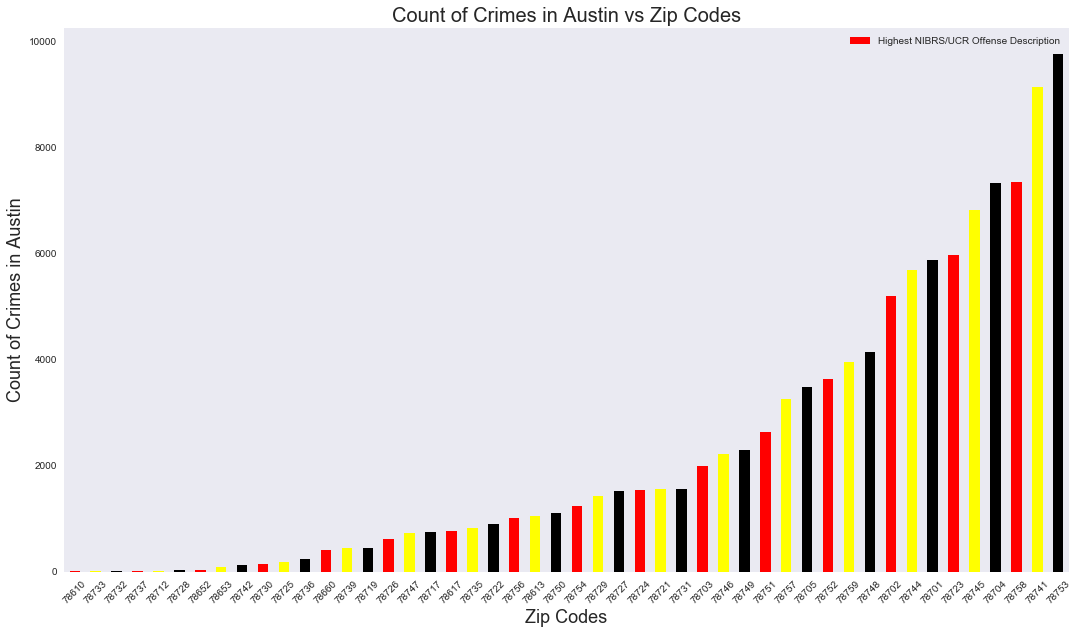

In [13]:
df_crime_zip_code = df_drop.groupby(['Zip'])['Highest NIBRS/UCR Offense Description'].count().reset_index()
df_crime_zip_code.sort_values(by=['Highest NIBRS/UCR Offense Description'],inplace=True)

plt.style.use('seaborn-dark')

df_crime_zip_code.plot(x='Zip',y='Highest NIBRS/UCR Offense Description', kind='bar',figsize=(18,10),color=['red','yellow','black']);
plt.xticks(rotation=45);
plt.xlabel('Zip Codes' ,fontsize=(18))
plt.ylabel('Count of Crimes in Austin',fontsize=(18))
plt.title('Count of Crimes in Austin vs Zip Codes',fontsize=(20));

<h3>Austin ZipCodes</h3>

In [14]:
austin_zips=['78735', '78701', '78753', '78724', '78741', '78704',
             '78748', '78758', '78744', '78747', '78756', '78759', 
             '78723', '78745', '78749', '78751', '78752', '78731', 
             '78702', '78722', '78705', '78757', '78721', '78739', 
             '78729', '78613', '78617', '78746', '78750', '78719', 
             '78703', '78736', '78653', '78727', '78652', '78754', 
             '78726', '78717', '78660', '78725', '78712', '78730', 
             '78742', '78728', '78732', '78737', '78733', '78610']

print('There are {} different zipcode in our original dataframe.'.format(len(austin_zips)))

There are 48 different zipcode in our original dataframe.


<h3>YELP API</h3>

In [15]:
keys ={"client_id":"acsWZVrkgYT2pceSbVY3SA" ,
      "client_secret": "3P6HCoVLXl5IddCFs0yokn8fZ2gzkvzzatJaUjG0PJrD5Xi9gbPvrkBwYFwMmnMP"}

token = requests.post(url="https://api.yelp.com/oauth2/token",data=keys).json()

access_token = token['access_token']

headers = {'Authorization': 'bearer %s' % access_token}

<h3>Yelp API Call by austin zipcode </h3>

In [16]:
info = []

for zips_codes in austin_zips:
    url = 'https://api.yelp.com/v3/businesses/search'
    params = {'location': zips_codes, 'sort_by': 'rating', 'limit' : 50}
    resp = requests.get(url=url, params=params, headers=headers).json()
    data = resp['businesses']
    info.append(data)

pprint.pprint(info)

[[{'categories': [{'alias': 'furniture', 'title': 'Furniture Stores'},
                  {'alias': 'mattresses', 'title': 'Mattresses'}],
   'coordinates': {'latitude': 30.2287220004587,
                   'longitude': -97.8228503246063},
   'display_phone': '(512) 730-1233',
   'distance': 3627.884628724,
   'id': 'urban-mattress-south-austin-austin-2',
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/aSO395lOVhCdlDORvcAV1Q/o.jpg',
   'is_closed': False,
   'location': {'address1': '5400 Brodie Ln',
                'address2': 'Ste 200',
                'address3': '',
                'city': 'Austin',
                'country': 'US',
                'display_address': ['5400 Brodie Ln',
                                    'Ste 200',
                                    'Austin, TX 78745'],
                'state': 'TX',
                'zip_code': '78745'},
   'name': 'Urban Mattress South Austin',
   'phone': '+15127301233',
   'price': '$$',
   'rating': 5.0,
   'review_coun

                'country': 'US',
                'display_address': ['7101 W Hwy 71', 'Austin, TX 78735'],
                'state': 'TX',
                'zip_code': '78735'},
   'name': 'SLAB BBQ & Beer',
   'phone': '+15122438000',
   'price': '$$',
   'rating': 4.5,
   'review_count': 111,
   'transactions': ['pickup'],
   'url': 'https://www.yelp.com/biz/slab-bbq-and-beer-austin-3?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'realestatesvcs', 'title': 'Real Estate Services'},
                  {'alias': 'realestateagents', 'title': 'Real Estate Agents'}],
   'coordinates': {'latitude': 30.2196446, 'longitude': -97.8416454},
   'display_phone': '(512) 600-9713',
   'distance': 3195.4202089799996,
   'id': 'realty-austin-southwest-austin-2',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/x4ObHL4TN800KqJvgkkkbg/o.jpg',
   'is_closed': False,
   'location': {'

   'id': 'salty-sow-austin',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/0dHPMIbmgYdeBrjlZlA0mA/o.jpg',
   'is_closed': False,
   'location': {'address1': '1917 Manor Rd',
                'address2': '',
                'address3': '',
                'city': 'Austin',
                'country': 'US',
                'display_address': ['1917 Manor Rd', 'Austin, TX 78722'],
                'state': 'TX',
                'zip_code': '78722'},
   'name': 'Salty Sow',
   'phone': '+15123912337',
   'price': '$$',
   'rating': 4.5,
   'review_count': 1922,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/salty-sow-austin?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'foodtrucks', 'title': 'Food Trucks'},
                  {'alias': 'dominican', 'title': 'Dominican'},
                  {'alias': 'empanadas', 'title': 'Empanadas'}],
   'coordinates': {'l

                                    'Ste 290',
                                    'Austin, TX 78758'],
                'state': 'TX',
                'zip_code': '78758'},
   'name': 'Mi Tradición',
   'phone': '+15123749910',
   'price': '$',
   'rating': 4.5,
   'review_count': 260,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/mi-tradici%C3%B3n-austin-3?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'bbq', 'title': 'Barbeque'},
                  {'alias': 'beerbar', 'title': 'Beer Bar'}],
   'coordinates': {'latitude': 30.3711177, 'longitude': -97.7246913},
   'display_phone': '(512) 351-9977',
   'distance': 4102.719912922,
   'id': 'slab-bbq-and-beer-austin',
   'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/CjLEAC8_63AqrEORyOeDjQ/o.jpg',
   'is_closed': False,
   'location': {'address1': '9012 Research Blvd',
                'address2': 'C4',
  

   'rating': 4.5,
   'review_count': 5,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/urban-roots-farm-austin?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'artclasses', 'title': 'Art Classes'}],
   'coordinates': {'latitude': 30.32273, 'longitude': -97.65415},
   'display_phone': '(512) 291-6282',
   'distance': 5058.876604319999,
   'id': 'green-devil-glass-studio-austin',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/zr4Ba_2re1dYV0oppzJAPw/o.jpg',
   'is_closed': False,
   'location': {'address1': '5005 Commercial Park',
                'address2': 'Ste 103',
                'address3': '',
                'city': 'Austin',
                'country': 'US',
                'display_address': ['5005 Commercial Park',
                                    'Ste 103',
                                    'Austin, TX 78724'],
                'state': 'T

   'coordinates': {'latitude': 30.262755, 'longitude': -97.714303},
   'display_phone': '(512) 212-7174',
   'distance': 3659.33901809,
   'id': 'fleet-coffee-austin',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/JJF-sC8nmu8ge3rDw9dIzQ/o.jpg',
   'is_closed': False,
   'location': {'address1': '2427 Webberville Rd',
                'address2': '',
                'address3': '',
                'city': 'Austin',
                'country': 'US',
                'display_address': ['2427 Webberville Rd', 'Austin, TX 78702'],
                'state': 'TX',
                'zip_code': '78702'},
   'name': 'Fleet Coffee',
   'phone': '+15122127174',
   'price': '$',
   'rating': 4.5,
   'review_count': 96,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/fleet-coffee-austin?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'mexican', 'title': 'Mexican'},
   

   'price': '$',
   'rating': 4.5,
   'review_count': 169,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/el-primo-austin?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'foodtrucks', 'title': 'Food Trucks'},
                  {'alias': 'korean', 'title': 'Korean'},
                  {'alias': 'japanese', 'title': 'Japanese'}],
   'coordinates': {'latitude': 30.261005, 'longitude': -97.757362},
   'display_phone': '(512) 529-0636',
   'distance': 1848.2402465739997,
   'id': 'dawa-sushi-austin-2',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/ZTt3PAZ-NbkSa_FMU-JbVg/o.jpg',
   'is_closed': False,
   'location': {'address1': '1210 Barton Springs Rd',
                'address2': '',
                'address3': None,
                'city': 'Austin',
                'country': 'US',
                'display_address': ['1210 Barton Springs Rd',
          

   'review_count': 32,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/beaux-seafood-manchaca?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'treeservices', 'title': 'Tree Services'},
                  {'alias': 'gardening', 'title': 'Nurseries & Gardening'}],
   'coordinates': {'latitude': 30.169097458943, 'longitude': -97.8184467455078},
   'display_phone': '(512) 567-3555',
   'distance': 372.119480566,
   'id': 'the-tree-man-austin-2',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/g8bopYVvVcqhU9pzMf2CuA/o.jpg',
   'is_closed': False,
   'location': {'address1': '',
                'address2': None,
                'address3': None,
                'city': 'Austin',
                'country': 'US',
                'display_address': ['Austin, TX 78749'],
                'state': 'TX',
                'zip_code': '78749'},
   'name': 'The Tree Man'

   'transactions': [],
   'url': 'https://www.yelp.com/biz/night-owl-austin-2?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'sushi', 'title': 'Sushi Bars'},
                  {'alias': 'asianfusion', 'title': 'Asian Fusion'},
                  {'alias': 'ramen', 'title': 'Ramen'}],
   'coordinates': {'latitude': 30.3547112891156,
                   'longitude': -97.7329172375578},
   'display_phone': '(512) 407-9000',
   'distance': 3896.4868543379994,
   'id': 'hanabi-ramen-and-kushiyaki-austin-4',
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/VZA8ivTKcd8n795saHfM_A/o.jpg',
   'is_closed': False,
   'location': {'address1': '2525 W Anderson Ln',
                'address2': 'Ste 120',
                'address3': '',
                'city': 'Austin',
                'country': 'US',
                'display_address': ['2525 W Anderson Ln',
                     

                'city': 'Austin',
                'country': 'US',
                'display_address': ['4118 Todd Ln',
                                    'Ste A',
                                    'Austin, TX 78744'],
                'state': 'TX',
                'zip_code': '78744'},
   'name': "Alberto's Appliances",
   'phone': '+15128529501',
   'rating': 4.5,
   'review_count': 74,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/albertos-appliances-austin?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'breweries', 'title': 'Breweries'},
                  {'alias': 'beerbar', 'title': 'Beer Bar'}],
   'coordinates': {'latitude': 30.2174492910035,
                   'longitude': -97.7610477949677},
   'display_phone': '(737) 300-1965',
   'distance': 3861.3226144039995,
   'id': 'st-elmo-brewing-company-austin',
   'image_url': 'https://s3-media2.fl.yelp

   'url': 'https://www.yelp.com/biz/st-elmo-brewing-company-austin?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'breweries', 'title': 'Breweries'}],
   'coordinates': {'latitude': 30.17623, 'longitude': -97.78372},
   'display_phone': '(512) 579-0679',
   'distance': 5303.37477915,
   'id': 'thirsty-planet-austin',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/n0HVm6SIOJ3LyIgtWuVOkg/o.jpg',
   'is_closed': False,
   'location': {'address1': '8201 S Congress Ave',
                'address2': '',
                'address3': '',
                'city': 'Austin',
                'country': 'US',
                'display_address': ['8201 S Congress Ave', 'Austin, TX 78745'],
                'state': 'TX',
                'zip_code': '78745'},
   'name': 'Thirsty Planet',
   'phone': '+15125790679',
   'price': '$',
   'rating': 4.5,
   'review_count': 65,
   'tran

  {'categories': [{'alias': 'foodtrucks', 'title': 'Food Trucks'},
                  {'alias': 'burgers', 'title': 'Burgers'}],
   'coordinates': {'latitude': 30.3212704266421, 'longitude': -97.739480091546},
   'display_phone': '(915) 861-6224',
   'distance': 98.37890913848,
   'id': 'jewboy-burgers-austin',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/GfFGAlkDPKwwV1EtcyG7vA/o.jpg',
   'is_closed': False,
   'location': {'address1': '5000 Burnet',
                'address2': None,
                'address3': None,
                'city': 'Austin',
                'country': 'US',
                'display_address': ['5000 Burnet', 'Austin, TX 78756'],
                'state': 'TX',
                'zip_code': '78756'},
   'name': 'Jewboy Burgers',
   'phone': '+19158616224',
   'price': '$$',
   'rating': 5.0,
   'review_count': 88,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/jewboy-burgers-austin?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_

  {'categories': [{'alias': 'bbq', 'title': 'Barbeque'},
                  {'alias': 'beerbar', 'title': 'Beer Bar'}],
   'coordinates': {'latitude': 30.3711177, 'longitude': -97.7246913},
   'display_phone': '(512) 351-9977',
   'distance': 3822.818672102,
   'id': 'slab-bbq-and-beer-austin',
   'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/CjLEAC8_63AqrEORyOeDjQ/o.jpg',
   'is_closed': False,
   'location': {'address1': '9012 Research Blvd',
                'address2': 'C4',
                'address3': '',
                'city': 'Austin',
                'country': 'US',
                'display_address': ['9012 Research Blvd',
                                    'C4',
                                    'Austin, TX 78758'],
                'state': 'TX',
                'zip_code': '78758'},
   'name': 'Slab BBQ & Beer',
   'phone': '+15123519977',
   'price': '$',
   'rating': 4.5,
   'review_count': 518,
   'transactions': ['delivery', 'pickup'],
   'url': 'https://www.ye

   'location': {'address1': '1917 Manor Rd',
                'address2': '',
                'address3': '',
                'city': 'Austin',
                'country': 'US',
                'display_address': ['1917 Manor Rd', 'Austin, TX 78722'],
                'state': 'TX',
                'zip_code': '78722'},
   'name': 'Salty Sow',
   'phone': '+15123912337',
   'price': '$$',
   'rating': 4.5,
   'review_count': 1922,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/salty-sow-austin?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'mexican', 'title': 'Mexican'}],
   'coordinates': {'latitude': 30.295789, 'longitude': -97.7442669},
   'display_phone': '(512) 432-1112',
   'distance': 4360.485325778,
   'id': 'cabo-bobs-burritos-austin-2',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/Ll5KW1S-YuPca2NuWtBv6Q/o.jpg',
   'is_closed': False,
   'loc

                'city': 'Austin',
                'country': 'US',
                'display_address': ['1901 S Lamar Blvd', 'Austin, TX 78704'],
                'state': 'TX',
                'zip_code': '78704'},
   'name': "Brown's Bar-B-Que",
   'phone': '+15125178520',
   'price': '$',
   'rating': 4.5,
   'review_count': 264,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/browns-bar-b-que-austin?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'hearingaidproviders',
                   'title': 'Hearing Aid Providers'}],
   'coordinates': {'latitude': 30.20636, 'longitude': -97.81311},
   'display_phone': '(512) 282-4327',
   'distance': 1662.698633304,
   'id': 'better-hearing-center-of-austin-austin',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/rQwga4qyuM8qNuzBQqPZCQ/o.jpg',
   'is_closed': False,
   'location': {'address1': '2500 W William Ca

                'display_address': ['9901 Brodie Ln',
                                    'Ste 110',
                                    'Austin, TX 78748'],
                'state': 'TX',
                'zip_code': '78748'},
   'name': 'JuiceLand',
   'phone': '+15123738731',
   'price': '$$',
   'rating': 4.5,
   'review_count': 51,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/juiceland-austin-24?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'sandwiches', 'title': 'Sandwiches'},
                  {'alias': 'lebanese', 'title': 'Lebanese'}],
   'coordinates': {'latitude': 30.17019, 'longitude': -97.82626},
   'display_phone': '(512) 412-1229',
   'distance': 5162.0867972,
   'id': 'hummus-cuisine-austin',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/fDKXh8AqgegCNS8FE5d2_g/o.jpg',
   'is_closed': False,
   'location': {'address1': '10106 Mancha

   'id': 'picnik-austin-austin-6',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/2b3YeRroSW8qBkDInEKkMA/o.jpg',
   'is_closed': False,
   'location': {'address1': '4801 Burnet Rd',
                'address2': '',
                'address3': None,
                'city': 'Austin',
                'country': 'US',
                'display_address': ['4801 Burnet Rd', 'Austin, TX 78756'],
                'state': 'TX',
                'zip_code': '78756'},
   'name': 'Picnik Austin',
   'phone': '+17372260644',
   'price': '$$',
   'rating': 4.5,
   'review_count': 257,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/picnik-austin-austin-6?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'mexican', 'title': 'Mexican'}],
   'coordinates': {'latitude': 30.2902755886316,
                   'longitude': -97.7344393730164},
   'display_phone': '(512) 473-8223'

   'rating': 5.0,
   'review_count': 76,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/austin-moto-academy-austin?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'shoes', 'title': 'Shoe Stores'},
                  {'alias': 'lingerie', 'title': 'Lingerie'}],
   'coordinates': {'latitude': 30.3340167999268,
                   'longitude': -97.7208938598633},
   'display_phone': '(512) 452-2323',
   'distance': 1171.542227496,
   'id': 'hard-candy-austin-3',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/KlIkE0efY_--H_zdajCvEw/o.jpg',
   'is_closed': False,
   'location': {'address1': '6601 N Lamar',
                'address2': '',
                'address3': '',
                'city': 'Austin',
                'country': 'US',
                'display_address': ['6601 N Lamar', 'Austin, TX 78752'],
                'state': 'TX',
                'zip_

                'zip_code': '78757'},
   'name': 'Healing Arts Housecalls',
   'phone': '+15125760929',
   'rating': 5.0,
   'review_count': 27,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/healing-arts-housecalls-austin?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'cuban', 'title': 'Cuban'},
                  {'alias': 'puertorican', 'title': 'Puerto Rican'}],
   'coordinates': {'latitude': 30.3402583550962,
                   'longitude': -97.7169592670936},
   'display_phone': '(512) 275-6013',
   'distance': 3912.056575102,
   'id': 'chagos-caribbean-cuisine-austin',
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/mzb-hI2eo3vBQe6aF3vcbw/o.jpg',
   'is_closed': False,
   'location': {'address1': '7301 N Lamar Blvd',
                'address2': '',
                'address3': '',
                'city': 'Austin',
                'country': 'US',

                'address2': None,
                'address3': '',
                'city': 'Austin',
                'country': 'US',
                'display_address': ['2404 E 7th St', 'Austin, TX 78702'],
                'state': 'TX',
                'zip_code': '78702'},
   'name': 'Saigon Le Vendeur',
   'phone': '+15123516916',
   'price': '$',
   'rating': 4.5,
   'review_count': 188,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/saigon-le-vendeur-austin?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'divebars', 'title': 'Dive Bars'}],
   'coordinates': {'latitude': 30.2676, 'longitude': -97.73849},
   'display_phone': '(512) 236-0008',
   'distance': 2159.634983722,
   'id': 'mugshots-austin',
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/dt_EWPH4xvqN2ZMasmE_hg/o.jpg',
   'is_closed': False,
   'location': {'address1': '407 E 7th St',
     

                'display_address': ['4600 Mueller Blvd',
                                    'Ste 1031',
                                    'Austin, TX 78723'],
                'state': 'TX',
                'zip_code': '78723'},
   'name': 'Mosaic Market',
   'phone': '+15123229252',
   'price': '$',
   'rating': 5.0,
   'review_count': 26,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/mosaic-market-austin-2?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'beerbar', 'title': 'Beer Bar'},
                  {'alias': 'czech', 'title': 'Czech'},
                  {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}],
   'coordinates': {'latitude': 30.2871694082172,
                   'longitude': -97.7031195536256},
   'display_phone': '(512) 401-3025',
   'distance': 1095.8309398498,
   'id': 'batch-craft-beer-and-kolaches-austin-2',
   'image_url': 'h

  {'categories': [{'alias': 'mexican', 'title': 'Mexican'}],
   'coordinates': {'latitude': 30.295789, 'longitude': -97.7442669},
   'display_phone': '(512) 432-1112',
   'distance': 349.2541709668,
   'id': 'cabo-bobs-burritos-austin-2',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/Ll5KW1S-YuPca2NuWtBv6Q/o.jpg',
   'is_closed': False,
   'location': {'address1': '2828 Rio Grande St',
                'address2': '',
                'address3': '',
                'city': 'Austin',
                'country': 'US',
                'display_address': ['2828 Rio Grande St', 'Austin, TX 78705'],
                'state': 'TX',
                'zip_code': '78705'},
   'name': "Cabo Bob's Burritos",
   'phone': '+15124321112',
   'price': '$',
   'rating': 4.5,
   'review_count': 247,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/cabo-bobs-burritos-austin-2?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsW

   'price': '$',
   'rating': 4.5,
   'review_count': 65,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/the-laundry-spot-austin-2?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'bridal', 'title': 'Bridal'},
                  {'alias': 'accessories', 'title': 'Accessories'}],
   'coordinates': {'latitude': 30.351041, 'longitude': -97.719386},
   'display_phone': '(512) 419-9001',
   'distance': 1258.2322234079998,
   'id': 'second-summer-bride-austin',
   'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/YfujTbmW6TO3DnufME-zGQ/o.jpg',
   'is_closed': False,
   'location': {'address1': '1308 W Anderson Ln',
                'address2': None,
                'address3': '',
                'city': 'Austin',
                'country': 'US',
                'display_address': ['1308 W Anderson Ln', 'Austin, TX 78757'],
                'state': 'TX',
           

                'city': 'Austin',
                'country': 'US',
                'display_address': ['7201 Levander Lp',
                                    'Bldg I & K',
                                    'Austin, TX 78702'],
                'state': 'TX',
                'zip_code': '78702'},
   'name': 'Emancipet',
   'phone': '+15125877729',
   'rating': 4.5,
   'review_count': 165,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/emancipet-austin?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'bodyshops', 'title': 'Body Shops'}],
   'coordinates': {'latitude': 30.2522, 'longitude': -97.69666},
   'display_phone': '(512) 662-3227',
   'distance': 2159.5411592,
   'id': 'u-first-auto-body-shop-austin',
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/z-d8OQX-fzWue_FuRLPyrg/o.jpg',
   'is_closed': False,
   'location': {'address1': '5119 E 7th St',


   'name': 'Oak Hill Eye Care',
   'phone': '+15122880444',
   'price': '$$',
   'rating': 4.5,
   'review_count': 71,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/oak-hill-eye-care-austin-2?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'pet_training', 'title': 'Pet Training'}],
   'coordinates': {'latitude': 30.18901, 'longitude': -97.89135},
   'display_phone': '(520) 334-7664',
   'distance': 1099.669424964,
   'id': 'k911-austin',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/oAZio20pNWXbj97kOfHejA/o.jpg',
   'is_closed': False,
   'location': {'address1': None,
                'address2': None,
                'address3': '',
                'city': 'Austin',
                'country': 'US',
                'display_address': ['Austin, TX 78739'],
                'state': 'TX',
                'zip_code': '78739'},
   'name': 'K911!',
   'ph

                'zip_code': '78750'},
   'name': 'Aladdin Doors of Austin',
   'phone': '+15129314298',
   'rating': 5.0,
   'review_count': 42,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/aladdin-doors-of-austin-austin-4?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'generaldentistry', 'title': 'General Dentistry'},
                  {'alias': 'cosmeticdentists', 'title': 'Cosmetic Dentists'}],
   'coordinates': {'latitude': 30.45612, 'longitude': -97.79515},
   'display_phone': '(512) 250-8225',
   'distance': 1967.3269004219997,
   'id': 'alan-schauer-dds-austin',
   'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/-CRKx_HwXmDCs8h_V4js_g/o.jpg',
   'is_closed': False,
   'location': {'address1': '12401 Hymeadow Dri',
                'address2': 'Bldg 5',
                'address3': '',
                'city': 'Austin',
                'country': 'U

   'url': 'https://www.yelp.com/biz/cedar-park-pet-sitting-services-cedar-park?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'japanese', 'title': 'Japanese'},
                  {'alias': 'sushi', 'title': 'Sushi Bars'}],
   'coordinates': {'latitude': 30.4699712854161,
                   'longitude': -97.8008981759186},
   'display_phone': '(512) 257-0788',
   'distance': 4035.974306696,
   'id': 'soto-restaurant-cedar-park',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/fkgl7AQp3O15WF8CvkGIXg/o.jpg',
   'is_closed': False,
   'location': {'address1': '11066 Pecan Park Blvd',
                'address2': 'Ste 402',
                'address3': '',
                'city': 'Cedar Park',
                'country': 'US',
                'display_address': ['11066 Pecan Park Blvd',
                                    'Ste 402',
                                    'Ce

   'location': {'address1': '1403 E 7th St',
                'address2': '',
                'address3': None,
                'city': 'Austin',
                'country': 'US',
                'display_address': ['1403 E 7th St', 'Austin, TX 78702'],
                'state': 'TX',
                'zip_code': '78702'},
   'name': 'The Doughminican',
   'phone': '+17187723378',
   'price': '$',
   'rating': 5.0,
   'review_count': 40,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/the-doughminican-austin?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'vet', 'title': 'Veterinarians'},
                  {'alias': 'nonprofit',
                   'title': 'Community Service/Non-Profit'}],
   'coordinates': {'latitude': 30.25312416993, 'longitude': -97.6887507913084},
   'display_phone': '(512) 587-7729',
   'distance': 11929.074551878,
   'id': 'emancipet-austin',


  {'categories': [{'alias': 'cosmeticsurgeons', 'title': 'Cosmetic Surgeons'}],
   'coordinates': {'latitude': 30.2956959995963, 'longitude': -97.825140235582},
   'display_phone': '(512) 450-1077',
   'distance': 2261.63607946,
   'id': 'andrew-p-trussler-md-austin-2',
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/BRZ13OjlKyY6Qz05Am7tpQ/o.jpg',
   'is_closed': False,
   'location': {'address1': '5656 Bee Cave Rd',
                'address2': 'J-200',
                'address3': '',
                'city': 'Austin',
                'country': 'US',
                'display_address': ['5656 Bee Cave Rd',
                                    'J-200',
                                    'Austin, TX 78746'],
                'state': 'TX',
                'zip_code': '78746'},
   'name': 'Andrew P. Trussler, MD',
   'phone': '+15124501077',
   'rating': 5.0,
   'review_count': 44,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/andrew-p-trussler-md-austin-2?adjust_creat

   'id': 'qualtech-automotive-austin',
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/POry2jwyU_NtwAClTgluLw/o.jpg',
   'is_closed': False,
   'location': {'address1': '10815 Ranch Rd 620 N',
                'address2': '',
                'address3': '',
                'city': 'Austin',
                'country': 'US',
                'display_address': ['10815 Ranch Rd 620 N', 'Austin, TX 78726'],
                'state': 'TX',
                'zip_code': '78726'},
   'name': 'QualTech Automotive',
   'phone': '+15123356043',
   'rating': 5.0,
   'review_count': 99,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/qualtech-automotive-austin?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'salad', 'title': 'Salad'},
                  {'alias': 'steak', 'title': 'Steakhouses'},
                  {'alias': 'coffee', 'title': 'Coffee & Tea'}],
   'coordi

  {'categories': [{'alias': 'bodyshops', 'title': 'Body Shops'},
                  {'alias': 'autorepair', 'title': 'Auto Repair'},
                  {'alias': 'autopartssupplies',
                   'title': 'Auto Parts & Supplies'}],
   'coordinates': {'latitude': 30.2281120419502,
                   'longitude': -97.6815468817949},
   'display_phone': '(512) 385-2462',
   'distance': 4830.86209444,
   'id': 'austin-veedub-austin-2',
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/BrAGWEY7FitPkOGPSvZ3uA/o.jpg',
   'is_closed': False,
   'location': {'address1': '1111 Old Bastrop Hwy',
                'address2': '',
                'address3': '',
                'city': 'Austin',
                'country': 'US',
                'display_address': ['1111 Old Bastrop Hwy', 'Austin, TX 78742'],
                'state': 'TX',
                'zip_code': '78742'},
   'name': 'Austin VeeDub',
   'phone': '+15123852462',
   'rating': 4.5,
   'review_count': 85,
   'transactions': 

                'city': 'Austin',
                'country': 'US',
                'display_address': ['1111B E 6th St', 'Austin, TX 78702'],
                'state': 'TX',
                'zip_code': '78702'},
   'name': 'Via 313 Pizza',
   'phone': '+15129391927',
   'price': '$$',
   'rating': 4.5,
   'review_count': 560,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/via-313-pizza-austin?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'icecream', 'title': 'Ice Cream & Frozen Yogurt'},
                  {'alias': 'gelato', 'title': 'Gelato'},
                  {'alias': 'coffee', 'title': 'Coffee & Tea'}],
   'coordinates': {'latitude': 30.25045, 'longitude': -97.7544999},
   'display_phone': '(512) 535-3617',
   'distance': 3669.489608272,
   'id': 'the-tasty-spoon-austin-2',
   'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/dIhKhVRiCM1Ic2V0EemtRQ/o.

                  {'alias': 'streetvendors', 'title': 'Street Vendors'}],
   'coordinates': {'latitude': 30.24166, 'longitude': -97.7582},
   'display_phone': '(512) 744-5651',
   'distance': 16529.14731241,
   'id': 'the-flying-carpet-austin',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/_MYPQmga7a89rf_Y-ModdA/o.jpg',
   'is_closed': False,
   'location': {'address1': '504 W Oltorf St',
                'address2': '',
                'address3': '',
                'city': 'Austin',
                'country': 'US',
                'display_address': ['504 W Oltorf St', 'Austin, TX 78704'],
                'state': 'TX',
                'zip_code': '78704'},
   'name': 'The Flying Carpet',
   'phone': '+15127445651',
   'price': '$',
   'rating': 4.5,
   'review_count': 227,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/the-flying-carpet-austin?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkg

                   'title': 'Drywall Installation & Repair'}],
   'coordinates': {'latitude': 30.44297, 'longitude': -97.63625},
   'display_phone': '(512) 293-9899',
   'distance': 14448.0188307,
   'id': 'roa-drywall-pflugerville',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/q4_EmgTCuwpkOiwGuE2RJA/o.jpg',
   'is_closed': False,
   'location': {'address1': '',
                'address2': '',
                'address3': '',
                'city': 'Pflugerville',
                'country': 'US',
                'display_address': ['Pflugerville, TX 78660'],
                'state': 'TX',
                'zip_code': '78660'},
   'name': 'Roa Drywall',
   'phone': '+15122939899',
   'rating': 5.0,
   'review_count': 38,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/roa-drywall-pflugerville?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'vietnamese'

   'display_phone': '(512) 213-2172',
   'distance': 915.438940992,
   'id': 'terra-vista-strings-austin',
   'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/tFCZYbnh00SgXC5N8oVAGA/o.jpg',
   'is_closed': False,
   'location': {'address1': None,
                'address2': None,
                'address3': '',
                'city': 'Austin',
                'country': 'US',
                'display_address': ['Austin, TX 78727'],
                'state': 'TX',
                'zip_code': '78727'},
   'name': 'Terra Vista Strings',
   'phone': '+15122132172',
   'rating': 5.0,
   'review_count': 36,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/terra-vista-strings-austin?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'autorepair', 'title': 'Auto Repair'},
                  {'alias': 'transmissionrepair',
                   'title': 'Transmission Repair

                'zip_code': '78652'},
   'name': 'All Paws Pet Care',
   'phone': '+19897375796',
   'rating': 5.0,
   'review_count': 66,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/all-paws-pet-care-manchaca?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'pet_sitting', 'title': 'Pet Sitting'}],
   'coordinates': {'latitude': 30.1420005061356,
                   'longitude': -97.8331419825554},
   'display_phone': '(512) 383-5663',
   'distance': 1303.290685662,
   'id': 'classi-diva-pet-spa-austin',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/BIrBp74hn5--sDxyjQ3FIw/o.jpg',
   'is_closed': False,
   'location': {'address1': '12110 Manchaca Rd',
                'address2': 'Ste 100',
                'address3': '',
                'city': 'Austin',
                'country': 'US',
                'display_address': ['12110 Manchaca Rd',
       

  {'categories': [{'alias': 'autoglass', 'title': 'Auto Glass Services'}],
   'coordinates': {'latitude': 30.3765795588146,
                   'longitude': -97.6897466381972},
   'display_phone': '(512) 339-0555',
   'distance': 3453.8602571639994,
   'id': 'low-price-auto-glass-austin',
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/XooN-hC33b-l4duxyJassA/o.jpg',
   'is_closed': False,
   'location': {'address1': '10720 N Lamar Blvd',
                'address2': 'Ste A',
                'address3': '',
                'city': 'Austin',
                'country': 'US',
                'display_address': ['10720 N Lamar Blvd',
                                    'Ste A',
                                    'Austin, TX 78753'],
                'state': 'TX',
                'zip_code': '78753'},
   'name': 'Low Price Auto Glass',
   'phone': '+15123390555',
   'rating': 5.0,
   'review_count': 129,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/low-price-auto-glass-

   'name': 'Motormania',
   'phone': '+15123310877',
   'rating': 5.0,
   'review_count': 70,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/motormania-austin?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'landscaping', 'title': 'Landscaping'},
                  {'alias': 'irrigation', 'title': 'Irrigation'},
                  {'alias': 'backflowservices', 'title': 'Backflow Services'}],
   'coordinates': {'latitude': 30.4605783453142,
                   'longitude': -97.8304517269135},
   'display_phone': '(512) 721-8564',
   'distance': 3242.5474778039993,
   'id': 'austex-sprinklers-cedar-park',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/FGPrwB4qsVUlkpstqY8mdQ/o.jpg',
   'is_closed': False,
   'location': {'address1': '2000 Windy Ter',
                'address2': 'Bldg 22, Ste B',
                'address3': '',
                'city': 'Cedar

   'location': {'address1': '10526 W Parmer Ln',
                'address2': 'Ste 425',
                'address3': '',
                'city': 'Austin',
                'country': 'US',
                'display_address': ['10526 W Parmer Ln',
                                    'Ste 425',
                                    'Austin, TX 78717'],
                'state': 'TX',
                'zip_code': '78717'},
   'name': 'Realty Austin - Northwest',
   'phone': '+15126009363',
   'rating': 5.0,
   'review_count': 130,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/realty-austin-northwest-austin-5?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'watch_repair', 'title': 'Watch Repair'},
                  {'alias': 'clockrepair', 'title': 'Clock Repair'}],
   'coordinates': {'latitude': 30.4984676, 'longitude': -97.7736533},
   'display_phone': '(512) 258-5706'

                'state': 'TX',
                'zip_code': '78660'},
   'name': 'DT Security - ADT Authorized Dealer',
   'phone': '+15123635603',
   'rating': 5.0,
   'review_count': 102,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/dt-security-adt-authorized-dealer-austin?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'furniture', 'title': 'Furniture Stores'},
                  {'alias': 'vintage', 'title': 'Used, Vintage & Consignment'}],
   'coordinates': {'latitude': 30.446797, 'longitude': -97.6528088},
   'display_phone': '(512) 202-3800',
   'distance': 2788.802433372,
   'id': 'pflugerville-furniture-center-pflugerville',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/jtmrZL0GaCG8g5JnqEoW0Q/o.jpg',
   'is_closed': False,
   'location': {'address1': '2405 W Pecan St',
                'address2': '',
                'address3': '',
         

                'city': 'Austin',
                'country': 'US',
                'display_address': ['Austin, TX 78741'],
                'state': 'TX',
                'zip_code': '78741'},
   'name': 'DJ Gatsby',
   'phone': '+15169675138',
   'rating': 5.0,
   'review_count': 136,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/dj-gatsby-austin-3?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'sewingalterations',
                   'title': 'Sewing & Alterations'},
                  {'alias': 'bridal', 'title': 'Bridal'}],
   'coordinates': {'latitude': 30.31982, 'longitude': -97.67619},
   'display_phone': '(512) 658-6048',
   'distance': 10231.120589995999,
   'id': 'olga-european-fashion-austin',
   'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/dNtOMCpV_VHwkOjEEprH0Q/o.jpg',
   'is_closed': False,
   'location': {'address1': '7003 Creighton Ln',

   'phone': '+15124713434',
   'rating': 4.5,
   'review_count': 107,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/the-university-of-texas-at-austin-austin?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'mexican', 'title': 'Mexican'},
                  {'alias': 'newamerican', 'title': 'American (New)'},
                  {'alias': 'vegan', 'title': 'Vegan'}],
   'coordinates': {'latitude': 30.2833881378174,
                   'longitude': -97.7413177490234},
   'display_phone': '(512) 227-5060',
   'distance': 619.6768980822,
   'id': 'burrito-factory-austin',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/9_ecTj1C8YWnsvUHho6zmQ/o.jpg',
   'is_closed': False,
   'location': {'address1': '2025 Guadalupe St',
                'address2': '',
                'address3': '',
                'city': 'Austin',
                'country': 'US',
           

   'location': {'address1': '1702 Lavaca St',
                'address2': '',
                'address3': '',
                'city': 'Austin',
                'country': 'US',
                'display_address': ['1702 Lavaca St', 'Austin, TX 78701'],
                'state': 'TX',
                'zip_code': '78701'},
   'name': 'El Mercado',
   'phone': '+15124777689',
   'price': '$',
   'rating': 3.0,
   'review_count': 188,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/el-mercado-austin-2?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'}],
 [{'categories': [{'alias': 'realestatesvcs', 'title': 'Real Estate Services'},
                  {'alias': 'realestateagents', 'title': 'Real Estate Agents'}],
   'coordinates': {'latitude': 30.3375503, 'longitude': -97.8038481},
   'display_phone': '(512) 600-9705',
   'distance': 4368.009312146,
   'id': 'realty-austin-westlake-austin-5',
   'imag

   'name': 'Oasis Texas Brewing Company',
   'phone': '+15122849407',
   'price': '$$',
   'rating': 4.0,
   'review_count': 150,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/oasis-texas-brewing-company-austin?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'endodontists', 'title': 'Endodontists'}],
   'coordinates': {'latitude': 30.372375, 'longitude': -97.802626},
   'display_phone': '(512) 346-7668',
   'distance': 2697.194616288,
   'id': 'collins-endodontics-austin',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/SvlTgGpcl-0syT6pJvNKpw/o.jpg',
   'is_closed': False,
   'location': {'address1': '7300 Ranch Rd 2222',
                'address2': '',
                'address3': 'Bldg V,Ste 212',
                'city': 'Austin',
                'country': 'US',
                'display_address': ['7300 Ranch Rd 2222',
                              

                'country': 'US',
                'display_address': ['5119 E 7th St', 'Austin, TX 78702'],
                'state': 'TX',
                'zip_code': '78702'},
   'name': 'Campus Auto Glass',
   'phone': '+15125526502',
   'rating': 5.0,
   'review_count': 26,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/campus-auto-glass-austin?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'tacos', 'title': 'Tacos'}],
   'coordinates': {'latitude': 30.26257, 'longitude': -97.70359},
   'display_phone': '(512) 926-1709',
   'distance': 4946.166638354,
   'id': 'marcelino-pan-y-vino-austin',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/oP2HlWVYQzGEo83b8Q41jA/o.jpg',
   'is_closed': False,
   'location': {'address1': '901 Tillery St',
                'address2': '',
                'address3': '',
                'city': 'Austin',
                '

  {'categories': [{'alias': 'foodtrucks', 'title': 'Food Trucks'}],
   'coordinates': {'latitude': 30.4458819586309,
                   'longitude': -97.6861944346712},
   'display_phone': '(512) 350-9814',
   'distance': 889.847699114,
   'id': 'garbos-lobster-truck-austin-5',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/3zUeQ4-kLS2YtS7IsAEOYg/o.jpg',
   'is_closed': False,
   'location': {'address1': '14735 Bratton Ln',
                'address2': None,
                'address3': '',
                'city': 'Austin',
                'country': 'US',
                'display_address': ['14735 Bratton Ln', 'Austin, TX 78728'],
                'state': 'TX',
                'zip_code': '78728'},
   'name': "Garbo's Lobster Truck",
   'phone': '+15123509814',
   'price': '$$',
   'rating': 4.5,
   'review_count': 242,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/garbos-lobster-truck-austin-5?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_me

   'price': '$$',
   'rating': 4.0,
   'review_count': 40,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/seafood-shack-austin?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'generaldentistry', 'title': 'General Dentistry'},
                  {'alias': 'cosmeticdentists', 'title': 'Cosmetic Dentists'},
                  {'alias': 'periodontists', 'title': 'Periodontists'}],
   'coordinates': {'latitude': 30.40217, 'longitude': -97.85449},
   'display_phone': '(512) 249-5555',
   'distance': 4542.591963752,
   'id': 'lakeside-dental-vincent-a-morales-dds-austin-2',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/volYyE5Oma5fOt_ObRoEtw/o.jpg',
   'is_closed': False,
   'location': {'address1': '6911 Ranch Rd 620 N',
                'address2': 'Ste C-100',
                'address3': '',
                'city': 'Austin',
                'country': 'US',

   'url': 'https://www.yelp.com/biz/austin-classic-limo-austin?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'coffeeroasteries', 'title': 'Coffee Roasteries'}],
   'coordinates': {'latitude': 30.233396, 'longitude': -97.872741},
   'display_phone': '(512) 810-3598',
   'distance': 8942.072724268,
   'id': 'malone-specialty-coffee-austin',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/Z1hIt-XwQBpw6dwpmFf_5g/o.jpg',
   'is_closed': False,
   'location': {'address1': '6911 W Hwy 290',
                'address2': '',
                'address3': '',
                'city': 'Austin',
                'country': 'US',
                'display_address': ['6911 W Hwy 290', 'Austin, TX 78749'],
                'state': 'TX',
                'zip_code': '78749'},
   'name': 'Malone Specialty Coffee',
   'phone': '+15128103598',
   'price': '$',
   'rating': 4.5,
   'revie

                'display_address': ['325 Ranch Rd 620 S',
                                    'Ste 101-B',
                                    'Austin, TX 78734'],
                'state': 'TX',
                'zip_code': '78734'},
   'name': 'New Freedom Vapor',
   'phone': '+15126553244',
   'price': '$$',
   'rating': 5.0,
   'review_count': 29,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/new-freedom-vapor-austin-3?adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=acsWZVrkgYT2pceSbVY3SA'},
  {'categories': [{'alias': 'pest_control', 'title': 'Pest Control'}],
   'coordinates': {'latitude': 30.359912, 'longitude': -97.948595},
   'display_phone': '(512) 792-9520',
   'distance': 5455.492331828,
   'id': 'care-pest-pros-austin',
   'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/oh3cv0dr0CJ2A1oQAy5EfQ/o.jpg',
   'is_closed': False,
   'location': {'address1': '15100 S Flamingo Dr',
                'addres

<h3>Generated Yelp Dataframe</h3>

In [17]:
list_business_name = []
list_review_counts = []
list_ratings = []
list_zip_codes = []
list_id_business = []
list_city =[]
list_state = []
list_categories = []
list_price = []

for x in range(len(info)):
    
    data = info[x]
   
    
    for item in data:
        list_business_name.append(item.get('name'))
        list_review_counts.append(item.get('review_count'))
        list_ratings.append(item.get('rating'))
        
        list_zip_codes.append(item.get('location').get('zip_code'))
        list_id_business.append(item.get('id'))
        list_city.append(item.get('location').get('city'))
        list_state.append(item.get('location').get('state'))
        list_categories.append(item.get('categories')[0].get('alias'))
        list_price.append(item.get('price'))

In [21]:
df_Yelp_API = pd.DataFrame({'Business_Name'   : list_business_name,
                            'Review_Counts'   : list_review_counts,
                            'Business_Ratings': list_ratings,
                            'Zip'       : list_zip_codes,
                            'Business_ID'     : list_id_business,
                            'City'            : list_city,
                            'State'           : list_state,
                            'Category'        : list_categories,
                           'Price':list_price})
def f(row):
    if row['Price'] == '$':
        val = 1
    elif row['Price'] == '$$':
        val = 2
    elif row['Price'] == '$$$':
        val = 3
    elif row['Price'] == '$$$$':
        val = 4
    else:
        val = 0
    return val

df_Yelp_API['Price Value'] = df_Yelp_API.apply(f,axis = 1)

df_Yelp_API.head(100)

,Business_ID,Business_Name,Business_Ratings,Category,City,Price,Review_Counts,State,Zip,Price Value
0,urban-mattress-south-austin-austin-2,Urban Mattress South Austin,5.0,furniture,Austin,$$,96,TX,78745,2
1,healthy-pet-austin,Healthy Pet,5.0,petstore,Austin,None,124,TX,78749,0
2,toast-entertainment-austin,Toast Entertainment,5.0,djs,Austin,None,108,TX,78735,0
3,union-jack-plumbing-austin,Union Jack Plumbing,5.0,plumbing,Austin,None,143,TX,78709,0
4,mercedes-flowers-austin-8,Mercedes Flowers,5.0,florists,Austin,$$,112,TX,78735,2
5,zen-well-austin,Zen Well,5.0,reflexology,Austin,None,187,TX,78745,0
6,sage-blossom-massage-austin-2,Sage Blossom Massage,5.0,massage_therapy,Austin,$$,87,TX,78735,2
7,barefoot-mosquito-control-austin,Barefoot Mosquito Control,5.0,pest_control,Austin,None,95,TX,78735,0
8,the-natural-gardener-austin,The Natural Gardener,4.5,gardening,Austin,$$,174,TX,78735,2
9,throckmortons-austin,Throckmorton's,4.5,watch_repair,Austin,$,98,TX,78735,1


In [22]:
df_Yelp_API['First_Review'] = " "
df_Yelp_API['Second_Review'] = " "
df_Yelp_API['Third_Review'] = " "

<h3>Also, need to trim down the original dataframe... original size is 109418 and Yelp  has a size of 2396...</h3>

In [23]:
len(df_drop)

109418

In [24]:
len(df_Yelp_API)

2399

In [25]:
df_Yelp_API = df_Yelp_API.dropna()

In [26]:
df_Yelp_API['Zip'] = df_Yelp_API['Zip'].astype(str)

In [27]:
df_Yelp_API.head(30)

,Business_ID,Business_Name,Business_Ratings,Category,City,Price,Review_Counts,State,Zip,Price Value,First_Review,Second_Review,Third_Review
0,urban-mattress-south-austin-austin-2,Urban Mattress South Austin,5.0,furniture,Austin,$$,96,TX,78745,2,,,
4,mercedes-flowers-austin-8,Mercedes Flowers,5.0,florists,Austin,$$,112,TX,78735,2,,,
6,sage-blossom-massage-austin-2,Sage Blossom Massage,5.0,massage_therapy,Austin,$$,87,TX,78735,2,,,
8,the-natural-gardener-austin,The Natural Gardener,4.5,gardening,Austin,$$,174,TX,78735,2,,,
9,throckmortons-austin,Throckmorton's,4.5,watch_repair,Austin,$,98,TX,78735,1,,,
10,manish-patel-od-todays-vision-south-towne-aust...,"Today's Vision South Towne - Manish Patel, O.D",5.0,optometrists,Austin,$$,80,TX,78735,2,,,
15,creative-images-by-keri-austin,Creative Images By Keri,5.0,hair_extensions,Austin,$$,37,TX,78749,2,,,
16,texas-honey-ham-company-west-lake-hills,Texas Honey Ham Company,4.5,sandwiches,West Lake Hills,$,195,TX,78746,1,,,
19,rudys-country-store-and-bar-b-q-austin-6,"Rudy's ""Country Store"" & Bar-B-Q",4.5,bbq,Austin,$$,900,TX,78746,2,,,
20,jack-allens-kitchen-oak-hill-austin-2,Jack Allen's Kitchen Oak Hill,4.5,tradamerican,Austin,$$,1300,TX,78735,2,,,


<h3>Checking to make sure they both have the same zipcodes</h3>

In [28]:
df_Yelp_API['Zip'].isin(austin_zips).value_counts()

True     1366
False      31
Name: Zip, dtype: int64

In [29]:
df_Yelp_API = df_Yelp_API[df_Yelp_API['Zip'].isin(austin_zips)]
len(df_Yelp_API)

1366

In [30]:
len(df_Yelp_API.Zip.unique())

46

In [31]:
len(df_crime_zip_code.Zip.unique())

48

<h3>total amount of rows after drop all duplicates and how are we going to handle all the information for all the rows in the original dataframe</h3>

In [32]:
df_Yelp_API[df_Yelp_API['Business_Name'] == 'Urban Mattress South Austin']

,Business_ID,Business_Name,Business_Ratings,Category,City,Price,Review_Counts,State,Zip,Price Value,First_Review,Second_Review,Third_Review
0,urban-mattress-south-austin-austin-2,Urban Mattress South Austin,5.0,furniture,Austin,$$,96,TX,78745,2,,,
700,urban-mattress-south-austin-austin-2,Urban Mattress South Austin,5.0,furniture,Austin,$$,96,TX,78745,2,,,


In [33]:
df_Yelp_API.duplicated().sum()

756

In [34]:
2298 - 1055

1243

<h3>drop duplicates in df_Yelp_API</h3>

In [35]:
df_Yelp_API = df_Yelp_API.drop_duplicates(keep='first')

In [36]:
df_Yelp_API.head()

,Business_ID,Business_Name,Business_Ratings,Category,City,Price,Review_Counts,State,Zip,Price Value,First_Review,Second_Review,Third_Review
0,urban-mattress-south-austin-austin-2,Urban Mattress South Austin,5.0,furniture,Austin,$$,96,TX,78745,2,,,
4,mercedes-flowers-austin-8,Mercedes Flowers,5.0,florists,Austin,$$,112,TX,78735,2,,,
6,sage-blossom-massage-austin-2,Sage Blossom Massage,5.0,massage_therapy,Austin,$$,87,TX,78735,2,,,
8,the-natural-gardener-austin,The Natural Gardener,4.5,gardening,Austin,$$,174,TX,78735,2,,,
9,throckmortons-austin,Throckmorton's,4.5,watch_repair,Austin,$,98,TX,78735,1,,,


<h3>Generate a Table comparing Review Count, Crime Count, and Business Ratings per Zipcode</h3>

In [37]:
#change back to str so to join dataframes
df_crime_zip_code['Zip'] = df_crime_zip_code.Zip.astype(str)

df_Review_Counts_Yelp = df_Yelp_API.groupby(['Zip'])['Review_Counts'].sum().reset_index()

df_avg_business_Ratings_Yelp= df_Yelp_API.groupby(['Zip'])['Business_Ratings'].mean().round(2).reset_index()
df_avg_business_Ratings_Yelp.rename_axis({'Business_Ratings': '%_Avg_Business_Ratings'},axis=1,inplace=True)

df_merge_crime_Review_counts = df_crime_zip_code.merge(df_Review_Counts_Yelp,on=['Zip'],how='outer')

df_table = df_merge_crime_Review_counts.merge(df_avg_business_Ratings_Yelp,on=['Zip'],how='outer')


df_table.style.background_gradient()

,Zip,Highest NIBRS/UCR Offense Description,Review_Counts,%_Avg_Business_Ratings
0,78610,2,368,4.5
1,78733,3,16,5
2,78732,5,591,4.67
3,78737,6,910,4.7
4,78712,19,171,4.12
5,78728,24,714,4.67
6,78652,31,32,5
7,78653,83,332,4.56
8,78742,125,40,4.5
9,78730,140,213,4.75


<h3>this code needs alot of clean up and comments....Plus...Below is a start of review...all we have to do is loop through datafame with the bussiness id.</h3>

In [38]:
url_review = 'https://api.yelp.com/v3/businesses/urban-mattress-south-austin-austin-2/reviews'

In [39]:
api_reviews = requests.get(url=url_review,headers=headers).json()

In [40]:
pprint.pprint(api_reviews)

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I was searching for a comfortable mattress and visited '
                      'several different stores in Austin. Deciding on a '
                      'mattress is no small decision.  But Troy was great...',
              'time_created': '2017-11-15 18:16:20',
              'url': 'https://www.yelp.com/biz/urban-mattress-south-austin-austin-2?hrid=pBFCXwUrSfK2fu7HUzJp7A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/xyxyOQpER96wH5XKR7P2kw/o.jpg',
                       'name': 'Pam Y.'}},
             {'rating': 5,
              'text': 'I was helped by a Hannah at this store and she was '
                      'helpful and informative but not pushy or a typical '
                      'mattress salesperson. I ended up purchasing my...',
    

In [41]:
api_reviews['reviews'][2]['text']

'Troy was great. Very knowledgeable on mattress and pillow type. He was welcoming and friendly. The mattress is soft and support. We are excited for al the...'